# Market Mix Modelling for an e-commerce firm

#### Problem statment:

Eleckart, an e-commerce firm based out of Ontario, Canada spends a significant amount of money on marketing. The marketing budget is spent on commercials, online campaigns and pricing & promotion strategies. Eleckart’s CFO feels that the money spent over the last 12 months did not have enough impact and that the budget can be cut or optimally reallocated across marketing levers to improve revenue.

#### Goal:
As part of the marketing team, which is working on budget optimisation, we need to develop a market mix model with the following objectives:

- Observe the actual impact of different marketing variables over the last one year
- Recommend the optimal budget allocation for different marketing levers for the next year


In [978]:
# import libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Phase 1: Understanding the data

## 1.1 Understanding order level data - Nanditha

In [979]:
products = pd.read_csv('ConsumerElectronics.csv', 
                        encoding='ISO-8859-1',
                        dtype={'order_id':'Int64', 'order_item_id':'Int64','cust_id':'str','pincode':'str','gmv':'str'},
                        parse_dates =['order_date'])

In [980]:
products.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000,3419300926147000,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200,1420830839915200,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800,2421912925714800,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400,4416592101738400,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400,4419525153426400,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [981]:
products['gmv']=pd.to_numeric(products.gmv,errors='coerce')
products[products.gmv.isna()].fsn_id.count()

4904

In [982]:
products['cust_id']=pd.to_numeric(products.cust_id,errors='coerce')
products[products.cust_id.isna()].fsn_id.count()

4904

In [983]:
products['pincode']=pd.to_numeric(products.pincode,errors='coerce')
products[products.pincode.isna()].fsn_id.count()

4904

In [984]:
products['deliverybdays']=pd.to_numeric(products.deliverybdays,errors='coerce')
products[products.deliverybdays.isna()].fsn_id.count()

1312972

In [985]:
products['deliverycdays']=pd.to_numeric(products.deliverycdays,errors='coerce')
products[products.deliverycdays.isna()].fsn_id.count()

1312971

In [986]:
products.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000,3419300926147000,6400.0,1,NaN,NaN,COD,5,-1.012991e+18,-7.791756e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200,1420830839915200,6900.0,1,NaN,NaN,COD,7,-8.990325e+18,7.335411e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800,2421912925714800,1990.0,1,NaN,NaN,COD,10,-1.040443e+18,-7.477688e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400,4416592101738400,1690.0,1,NaN,NaN,Prepaid,4,-7.604961e+18,-5.835932e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400,4419525153426400,1618.0,1,NaN,NaN,Prepaid,6,2.894557e+18,5.347354e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [987]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null datetime64[ns]
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null int64
order_item_id                      1648824 non-null int64
gmv                                1643920 non-null float64
units                              1648824 non-null int64
deliverybdays                      335852 non-null float64
deliverycdays                      335853 non-null float64
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1643920 non-null float64
pincode                            1643920 non-null float64
product_analytic_super_category    1648824 non-null obje

In [988]:
## Drop all null values in gmv
products.dropna(subset=['gmv'],inplace=True)
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1643920 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1643920 non-null object
order_date                         1643920 non-null datetime64[ns]
Year                               1643920 non-null int64
Month                              1643920 non-null int64
order_id                           1643920 non-null int64
order_item_id                      1643920 non-null int64
gmv                                1643920 non-null float64
units                              1643920 non-null int64
deliverybdays                      335850 non-null float64
deliverycdays                      335851 non-null float64
s1_fact.order_payment_type         1643920 non-null object
sla                                1643920 non-null int64
cust_id                            1643920 non-null float64
pincode                            1643920 non-null float64
product_analytic_super_category    1643920 non-null obje

In [989]:
1312972/1643920

0.798683634240109

In [990]:
products.drop(axis=1,columns=['deliverybdays','deliverycdays'],inplace=True)

In [991]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1643920 entries, 0 to 1648823
Data columns (total 18 columns):
fsn_id                             1643920 non-null object
order_date                         1643920 non-null datetime64[ns]
Year                               1643920 non-null int64
Month                              1643920 non-null int64
order_id                           1643920 non-null int64
order_item_id                      1643920 non-null int64
gmv                                1643920 non-null float64
units                              1643920 non-null int64
s1_fact.order_payment_type         1643920 non-null object
sla                                1643920 non-null int64
cust_id                            1643920 non-null float64
pincode                            1643920 non-null float64
product_analytic_super_category    1643920 non-null object
product_analytic_category          1643920 non-null object
product_analytic_sub_category      1643920 non-null obje

In [992]:
products.fsn_id.value_counts()

ACCE6VGHYKYFX4WB    37406
SELDXMC3JNMTQMGV    17801
CAMDA6RJERF8HS4G    16706
ACCDXEGXG8HJUCSK    14221
ACCECYHH4QDNZXEX    13617
ACCE9C3WYBMPJ98R    13232
CAMDUGSSHXQ9FDHM    12480
ACCEBEMGQUZYJBKG    12238
ACCEBASUU3ZZRDYV    12192
ACCEBEMEWFSDJH72    11732
SELE863FGS4HMQWF    10774
ACCDVZ83VBHCWFFA    10350
ACCEE3JNKNFH5KBG     9034
CAMDF4FHEHKYNSHY     8884
ACCDH7MFZJGRWJCW     7963
ACCE9R3UDGBBE4ZY     7725
CAME6FWA7RHNXGPF     7399
ACCDQGZS3EK5WVR5     6817
ACCE53FQZTN9UNPG     6542
AUDDGN3Q2GSCBUSX     6522
ACCDVUZFPGSGGYRD     6491
ACCE9R3U6DZENXFM     6409
SELEH8VYQRNA99BH     6256
ACCE58P94S5YVBYG     6240
ACCEDHZHERAJFMNT     6061
VGLEF3X3KGCZZT3N     6040
ACCEAJP64HZ8GZGR     5485
ACCE6VGHRPDQR5GD     5100
ACCE9R3UCZZGFVVQ     4966
ACCDFZEJ6ZGSWRMK     4882
                    ...  
ACCEDSCYQFGC88JZ        1
AVMDCUDG7APYZS58        1
ACCEKFVHU58HESVC        1
ACCD84KGRZYWQUJZ        1
ACCEGXK7QK2CGYAN        1
ACCEDV5ZYCN294TC        1
ACCEJ2EJEBXMCDJR        1
ACCEFSPNKUDV

In [993]:
products.Year.value_counts(dropna=False)

2016    855006
2015    788914
Name: Year, dtype: int64

In [994]:
products.Month.value_counts(dropna=False)

9     207472
10    205730
12    158151
5     157072
3     153299
2     144084
1     143768
4     134390
11    129448
6     121798
7      88439
8        269
Name: Month, dtype: int64

In [995]:
products['s1_fact.order_payment_type'].value_counts(dropna=False)

COD        1191443
Prepaid     452477
Name: s1_fact.order_payment_type, dtype: int64

In [996]:
products.pincode.value_counts(dropna=False)

-9.031043e+18    13506
-9.779010e+17    12055
 7.346497e+18     7243
 8.649648e+18     7188
 6.404913e+18     6398
 9.226248e+17     6377
 6.513331e+18     6288
 2.175163e+18     6146
-4.769171e+18     6139
 2.222912e+18     6031
-3.444751e+18     5377
 7.686938e+18     5312
-4.317473e+18     4606
-7.885152e+18     4435
 4.337281e+18     4317
 8.424231e+18     4263
-9.141541e+18     3929
 6.820321e+18     3862
 4.705607e+18     3837
 6.148223e+18     3785
 3.654846e+16     3753
-2.498956e+18     3722
 6.195476e+18     3438
-7.008123e+18     3417
 6.280637e+18     3352
 2.662204e+18     3318
-2.112132e+18     3290
-5.922363e+18     3240
 1.151368e+18     3214
-7.204916e+17     3065
                 ...  
-5.869364e+18        1
 3.353643e+18        1
 6.024585e+18        1
-8.127330e+18        1
-6.010972e+18        1
-6.351221e+18        1
-5.022779e+18        1
 8.380523e+18        1
 1.252046e+18        1
 4.759496e+18        1
-6.526234e+18        1
-3.989416e+16        1
-1.071054e+

In [997]:
products.product_analytic_super_category.value_counts(dropna=False)

CE    1643920
Name: product_analytic_super_category, dtype: int64

In [998]:
products.product_analytic_vertical.value_counts(dropna=False)

LaptopSpeaker              286665
MobileSpeaker              249643
AudioMP3Player             112545
PhysicalGame               104799
HomeAudioSpeaker            85306
GamingHeadset               62180
GamePad                     58944
DSLR                        56514
Flash                       48717
SelectorBox                 46122
CameraBattery               41187
RemoteControl               39583
Point & Shoot               38618
CameraTripod                37770
GamingMouse                 37356
VideoGlasses                36644
Lens                        35367
FMRadio                     28147
VideoPlayer                 20222
HandheldGamingConsole       19344
CameraStorageMemoryCard     17943
CameraBag                   17465
CameraBatteryCharger        15614
Binoculars                  14554
Filter                      12684
GamingConsole                9667
GamingAccessoryKit           9474
CodeInTheBoxGame             9331
Microphone                   9049
TVOutCableAcce

In [999]:
products.product_analytic_sub_category.value_counts(dropna=False)

Speaker                542122
CameraAccessory        238862
GamingAccessory        201318
TVVideoSmall           142571
HomeAudio              124415
Game                   114130
AudioMP3Player         112545
Camera                 100942
GamingConsole           29011
CameraStorage           17943
AudioAccessory          11676
HomeTheatre              4245
AmplifierReceiver        4043
GameMembershipCards        97
Name: product_analytic_sub_category, dtype: int64

In [1000]:
products.product_mrp.value_counts(dropna=False)

999       108339
1999       79533
499        41141
310        40774
599        40200
4999       37549
2999       36491
3999       34691
500        31292
1000       30420
1299       29335
1990       27359
1499       27223
799        24815
699        24651
800        23852
3499       23357
399        20089
2499       18863
2990       18537
1599       18374
34950      16711
1199       15813
7999       15476
950        15411
3199       14875
1100       14836
899        14516
400        13973
2000       13595
           ...  
3439           1
6517           1
113995         1
2430           1
8580           1
63900          1
9600           1
21890          1
4491           1
14743          1
63885          1
8599           1
1430           1
4504           1
2505           1
34190          1
9632           1
51647          1
20899          1
7598           1
434            1
2489           1
17840          1
2488           1
6586           1
4543           1
5564           1
15800         

In [1001]:
products.product_procurement_sla.value_counts(dropna=False)

 2       527125
 1       307539
 3       302481
 5       221322
 4       119840
-1        75611
 0        42357
 6        18501
 7        11719
 15        6159
 14        5256
 1000      4735
 13         523
 8          522
 9           97
 10          73
 12          60
Name: product_procurement_sla, dtype: int64

In [1002]:
products.sla.value_counts(dropna=False)

6       236755
5       233013
4       217226
7       201521
3       177330
8       154897
2       109819
9        97793
1        74083
10       57535
11       33833
12       19554
13       11135
0         5974
14        5938
15        3181
16        1822
17         891
18         511
19         289
20         158
21         106
25          76
22          72
24          69
23          59
26          58
27          44
28          36
30          31
29          20
31          12
32          10
35           7
38           7
33           6
42           5
39           5
34           4
44           3
41           3
40           3
61           3
36           3
37           2
239          2
45           2
47           2
184          1
175          1
145          1
68           1
1004         1
60           1
56           1
52           1
51           1
46           1
43           1
1006         1
Name: sla, dtype: int64

In [1003]:
products['day']=products.order_date.dt.day

In [1004]:
products.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,day
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000,3419300926147000,6400.0,1,COD,5,-1.012991e+18,-7.791756e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,17
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200,1420830839915200,6900.0,1,COD,7,-8.990325e+18,7.335411e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,19
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800,2421912925714800,1990.0,1,COD,10,-1.040443e+18,-7.477688e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,20
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400,4416592101738400,1690.0,1,Prepaid,4,-7.604961e+18,-5.835932e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,14
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400,4419525153426400,1618.0,1,Prepaid,6,2.894557e+18,5.347354e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,17


In [1005]:
### Filter the  camera accessory, home audio and gaming accessory sub-categories
products_filtered=pd.DataFrame(products[products.product_analytic_sub_category.isin(['CameraAccessory','GamingAccessory','HomeAudio'])])


In [1006]:
products_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564595 entries, 0 to 1647205
Data columns (total 19 columns):
fsn_id                             564595 non-null object
order_date                         564595 non-null datetime64[ns]
Year                               564595 non-null int64
Month                              564595 non-null int64
order_id                           564595 non-null int64
order_item_id                      564595 non-null int64
gmv                                564595 non-null float64
units                              564595 non-null int64
s1_fact.order_payment_type         564595 non-null object
sla                                564595 non-null int64
cust_id                            564595 non-null float64
pincode                            564595 non-null float64
product_analytic_super_category    564595 non-null object
product_analytic_category          564595 non-null object
product_analytic_sub_category      564595 non-null object
product_analy

In [1007]:
## Assign week numbers
products_filtered['Week_Number'] = products_filtered.order_date.dt.week

In [1008]:
#Stripping the time part from the order_date as this is not required
products_filtered['order_date']=products_filtered['order_date'].apply(lambda x:x.replace(hour=0,minute=0,second=0,microsecond=0))


In [1009]:
#Removing some outlier values
products_filtered=pd.DataFrame(products_filtered[~products_filtered.product_procurement_sla.isin([0,-1])])
products_filtered=pd.DataFrame(products_filtered[products_filtered.gmv<=3999])
products_filtered=pd.DataFrame(products_filtered[products_filtered.gmv>0])

In [1011]:
products_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509512 entries, 2 to 1647171
Data columns (total 20 columns):
fsn_id                             509512 non-null object
order_date                         509512 non-null datetime64[ns]
Year                               509512 non-null int64
Month                              509512 non-null int64
order_id                           509512 non-null int64
order_item_id                      509512 non-null int64
gmv                                509512 non-null float64
units                              509512 non-null int64
s1_fact.order_payment_type         509512 non-null object
sla                                509512 non-null int64
cust_id                            509512 non-null float64
pincode                            509512 non-null float64
product_analytic_super_category    509512 non-null object
product_analytic_category          509512 non-null object
product_analytic_sub_category      509512 non-null object
product_analy

In [1012]:
products_filtered.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,day,Week_Number
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2421912925714800,2421912925714800,1990.0,1,COD,10,-1.040443e+18,-7.477688e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,20,43
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4416592101738400,4416592101738400,1690.0,1,Prepaid,4,-7.604961e+18,-5.835932e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,14,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4419525153426400,4419525153426400,1618.0,1,Prepaid,6,2.894557e+18,5.347354e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,17,42
5,ACCCX3S5JGAJETYR,2015-10-17,2015,10,3419188825145600,3419188825145600,3324.0,1,Prepaid,5,-7.641546e+18,-1.919053e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,17,42
6,ACCCX3S5JGAJETYR,2015-10-16,2015,10,3418428515041500,3418428515041500,3695.0,1,Prepaid,6,-7.156140e+16,6.404913e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,16,42


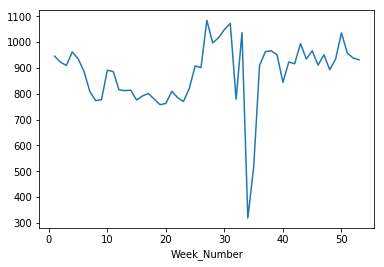

In [1013]:
prd_grp=products_filtered.groupby('Week_Number')
prd_grp.mean().gmv.plot()

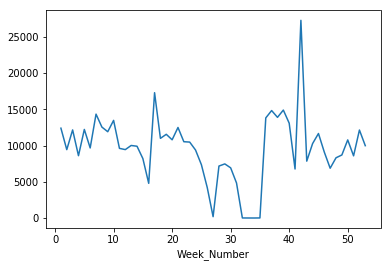

In [1014]:
prd_grp=products_filtered.groupby('Week_Number')
prd_grp.count().order_id.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x1e5f86f2828>,
 'caps': [<matplotlib.lines.Line2D at 0x1e5f86f2d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e5f86f22b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6c9002908>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6c9002d30>],
 'means': []}

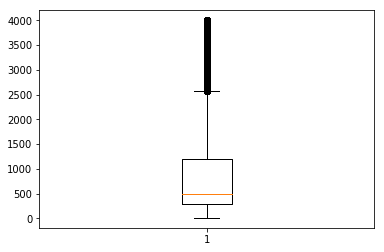

In [1015]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.boxplot(products_filtered.gmv)

In [1016]:
np.percentile(products_filtered.gmv,[5,10,20,50,70,80,90,95,99,100])

array([ 174.,  199.,  259.,  499.,  970., 1540., 2319., 2799., 3649.,
       3999.])

In [1017]:
products_filtered.product_mrp.describe()

count    509512.000000
mean       1988.421649
std        3728.635695
min          63.000000
25%         699.000000
50%        1099.000000
75%        2000.000000
max       50000.000000
Name: product_mrp, dtype: float64

## 1.2 Understanding Media Investment (Krishnan)

In [1018]:
from pandas import ExcelWriter
from pandas import ExcelFile

media_invest = pd.read_excel('Media data and other information.xlsx', sheet_name='Media Investment',skiprows=2)

print(media_invest.columns)

Index(['Unnamed: 0', 'Year', 'Month', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates',
       'SEM', 'Radio', 'Other'],
      dtype='object')


In [1019]:
media_invest.head()

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,NaN,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN
1,NaN,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN
2,NaN,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN
3,NaN,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN
4,NaN,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN


In [1020]:
#Dropping the Unnamed column
media_invest.drop(media_invest.columns[[0]],axis=1,inplace=True)

In [1021]:
media_invest.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN
1,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN
2,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN
3,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN
4,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN


In [1022]:
#Retaining only the rows corresponding to the 12 months from Jul2015 to Jun2016
media_invest.drop(media_invest[media_invest.index > 11].index,inplace=True)

In [1023]:
#Replacing all the missing values with zeros
media_invest.fillna(0,inplace=True)

In [1024]:
#Converting the year and month values to integer values from floating points
media_invest = media_invest.astype({"Year":'int64', "Month":'int64'}) 

In [1025]:
#Trimming the columns of any white spaces
media_invest.columns = media_invest.columns.str.strip()

In [1026]:
media_invest

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.00,0.000000
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.00,0.000000
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.00,0.000000
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.00,0.000000
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.00,0.000000
5,2015,12,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,0.00,0.000000
6,2016,1,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.70,27.090000
7,2016,2,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,0.00,0.000000
8,2016,3,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,5.193591,0.87,15.945545
9,2016,4,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,4.219958,0.00,0.000000


In [1027]:
media_invest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 12 columns):
Year                 12 non-null int64
Month                12 non-null int64
Total Investment     12 non-null float64
TV                   12 non-null float64
Digital              12 non-null float64
Sponsorship          12 non-null float64
Content Marketing    12 non-null float64
Online marketing     12 non-null float64
Affiliates           12 non-null float64
SEM                  12 non-null float64
Radio                12 non-null float64
Other                12 non-null float64
dtypes: float64(10), int64(2)
memory usage: 1.2 KB


#### Observations:
- media_invest dataframe has 12 columns
- `Year` and `month` columns represent the year and month of investment
- The other 10 columns represent the monthly investments in 10 different advertising channels during the period Jul2015-Jun2016 



## 1.3 Understanding monthly NPS score

In [1028]:
nps_score = pd.read_excel('Media data and other information.xlsx', sheet_name='Monthly NPS Score')
print(nps_score.columns)

Index(['Unnamed: 0', 'July'15', 'Aug'15', 'Sept'15', 'Oct'15', 'Nov'15',
       'Dec'15', 'Jan'16', 'Feb'16', 'Mar'16', 'Apr'16', 'May'16', 'June'16'],
      dtype='object')


In [1029]:
nps_score = nps_score.T

In [1030]:
nps_score.columns = ['NPS','Stock Index']

In [1031]:
nps_score = nps_score.iloc[1:]

In [1032]:
nps_score

,NPS,Stock Index
July'15,54.5996,1177
Aug'15,59.9871,1206
Sept'15,46.9254,1101
Oct'15,44.3984,1210
Nov'15,47,1233
Dec'15,45.8,1038
Jan'16,47.093,1052
Feb'16,50.3274,1222
Mar'16,49.0206,1015
Apr'16,51.8276,1242


In [1033]:
nps_score.reset_index(level=0, inplace=True)

In [1034]:
#Replacing the long month names with the shorter month names to help with the datetime parsing
nps_score = nps_score.replace('July', 'Jul', regex=True)
nps_score = nps_score.replace('Sept', 'Sep', regex=True)
nps_score = nps_score.replace('June', 'Jun', regex=True)

In [1035]:
nps_score['MonthYear'] =  pd.to_datetime(nps_score['index'], format="%b'%y")

In [1036]:
nps_score.drop(['index'],axis=1,inplace=True)

In [1037]:
nps_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
NPS            12 non-null float64
Stock Index    12 non-null float64
MonthYear      12 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 368.0 bytes


In [1038]:
nps_score

,NPS,Stock Index,MonthYear
0,54.599588,1177.0,2015-07-01
1,59.987101,1206.0,2015-08-01
2,46.925419,1101.0,2015-09-01
3,44.398389,1210.0,2015-10-01
4,47.000000,1233.0,2015-11-01
5,45.800000,1038.0,2015-12-01
6,47.093031,1052.0,2016-01-01
7,50.327406,1222.0,2016-02-01
8,49.020550,1015.0,2016-03-01
9,51.827605,1242.0,2016-04-01


#### Observations:
- nps_score dataframe has 3 columns
- `NPS` column represents the NPS score for the corresponding month value reprsented by `MonthYear` column
- `Stock Index` column represents the company stock price for the corresponding month value reprsented by `MonthYear` column

## 1.4 Understanding Special Sale Calendar (Krishnan)

In [1039]:
spl_sales = pd.read_excel('Media data and other information.xlsx', sheet_name='Special Sale Calendar')
spl_sales.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Sales Calendar'], dtype='object')

In [1040]:
#Dropping the first column 
spl_sales.drop(['Unnamed: 0'],axis=1,inplace=True)

In [1041]:
#Renaming the column to Year column as it contains year values
spl_sales.rename(columns={"Unnamed: 1": "Year"},inplace=True)

#Replacing all the missing values with zeros
spl_sales['Year'].fillna(0,inplace=True)

In [1042]:
#Retaining only the rows corresponding to the special sale dates
spl_sales.drop(spl_sales[spl_sales.index > 11].index,inplace=True)

In [1043]:
#Converting the year and month values to integer values from floating points
spl_sales = spl_sales.astype({"Year":'int64'}) 

In [1044]:
#Filling up all the Year column values with the appropriate values
spl_sales.at[(spl_sales.index >= 1) & (spl_sales.index<=5),'Year']=2015
spl_sales.at[(spl_sales.index >= 7) & (spl_sales.index<=11),'Year']=2016

In [1045]:
#Creating a column with the row index values
spl_sales['rowIndex'] = spl_sales.index

In [1046]:
import datetime

#Custom function for extracting the start and end dates of the sale
def extractSaleDates(index, daterange):
    
    #Removing any trailing/leading white spaces
    datestr = daterange.strip()
    
    if(index != 5):
        
        if(index < 5):
            year=2015
        else:
            year=2016
    
        #Replacing 'th' with empty spaces
        datestr = datestr.replace("th","")
   
        #Splitting into day and month parts
        datestr = datestr.split(" ")
    
        days = datestr[0][1:].split("-")
        month = datestr[1][0:3]
    
        #Converting month name to a number
        monthNo = datetime.datetime.strptime(month, '%b').month
        startDay = int(days[0])
        endDay = int(days[1])
          
        startDate = datetime.datetime(year=year, month=monthNo, day=startDay)
        endDate = datetime.datetime(year=year, month=monthNo, day=endDay)
    
        if(startDate < endDate):    
            dateinfo = [startDate,endDate]
        else:
            dateinfo = [endDate,startDate]
            
    else:
        # Special case (25th Dec'15 - 3rd Jan'16)
        
        #Replacing 'th' with empty spaces
        datestr = datestr.replace("th","")
        datestr = datestr.replace("rd","")
        
        
        #Splitting the string into two parts
        datestr = datestr.split("-")
        startDatestr = datestr[0].replace(" ","")[1:]
        endDatestr = datestr[1].replace(" ","")[:-1]
        
        startDate = datetime.datetime.strptime(startDatestr, "%d%b'%y")
        endDate = datetime.datetime.strptime(endDatestr, "%d%b'%y")
        
        
        dateinfo = [startDate,endDate]
           
               
    return dateinfo
    

In [1047]:
#Creating the "Start Date" and "End Date" columns to represent the start and end dates of the special sale window
spl_sales['Start Date'] = spl_sales.apply(lambda x: extractSaleDates(x['rowIndex'],x['Sales Calendar'])[0],axis=1)
spl_sales['End Date'] = spl_sales.apply(lambda x: extractSaleDates(x['rowIndex'],x['Sales Calendar'])[1],axis=1)

In [1048]:
#Dropping the columns that are no longer required
spl_sales.drop(['rowIndex'],axis=1,inplace=True)
spl_sales.drop(['Year'],axis=1,inplace=True)
spl_sales.drop(['Sales Calendar'],axis=1,inplace=True)

In [1049]:
spl_sales

,Start Date,End Date
0,2015-07-18,2015-07-19
1,2015-08-15,2015-08-17
2,2015-08-28,2015-08-30
3,2015-10-15,2015-10-17
4,2015-11-07,2015-11-14
5,2015-12-25,2016-01-03
6,2016-01-20,2016-01-22
7,2016-02-01,2016-02-02
8,2016-02-20,2016-02-21
9,2016-02-14,2016-02-15


#### Observations:
- `spl_sales` dataframe contains the special sale calendar between the period July 2015 - Jun 2016
- `spl_sales` dataframe contains two columns `Start Date` and `End Date` that contain the start and end dates for each special sale

## 1.5 Understanding Climate Data (Krishnan)

In [1050]:
#Creating climate data frame from the ONTARIO-20xx.xlsx

from pandas import ExcelWriter
from pandas import ExcelFile

climate2015 = pd.read_excel('ONTARIO-2015.xlsx', sheet_name='ONTARIO-2015',skiprows=24)
climate2016 = pd.read_excel('ONTARIO-2016.xlsx', sheet_name='ONTARIO-2016',skiprows=24)

In [1051]:
climate2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 27 columns):
Date/Time                    365 non-null datetime64[ns]
Year                         365 non-null int64
Month                        365 non-null int64
Day                          365 non-null int64
Data Quality                 229 non-null object
Max Temp (°C)                216 non-null float64
Max Temp Flag                13 non-null object
Min Temp (°C)                190 non-null float64
Min Temp Flag                39 non-null object
Mean Temp (°C)               190 non-null float64
Mean Temp Flag               39 non-null object
Heat Deg Days (°C)           190 non-null float64
Heat Deg Days Flag           39 non-null object
Cool Deg Days (°C)           190 non-null float64
Cool Deg Days Flag           39 non-null object
Total Rain (mm)              229 non-null float64
Total Rain Flag              7 non-null object
Total Snow (cm)              229 non-null float64
Total Sn

In [1052]:
climate2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 27 columns):
Date/Time                    366 non-null datetime64[ns]
Year                         366 non-null int64
Month                        366 non-null int64
Day                          366 non-null int64
Data Quality                 227 non-null object
Max Temp (°C)                226 non-null float64
Max Temp Flag                1 non-null object
Min Temp (°C)                219 non-null float64
Min Temp Flag                8 non-null object
Mean Temp (°C)               219 non-null float64
Mean Temp Flag               8 non-null object
Heat Deg Days (°C)           219 non-null float64
Heat Deg Days Flag           8 non-null object
Cool Deg Days (°C)           219 non-null float64
Cool Deg Days Flag           8 non-null object
Total Rain (mm)              227 non-null float64
Total Rain Flag              3 non-null object
Total Snow (cm)              227 non-null float64
Total Snow Fl

In [1053]:
climate = climate2015.append(climate2016,ignore_index=True)

In [1054]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 27 columns):
Date/Time                    731 non-null datetime64[ns]
Year                         731 non-null int64
Month                        731 non-null int64
Day                          731 non-null int64
Data Quality                 456 non-null object
Max Temp (°C)                442 non-null float64
Max Temp Flag                14 non-null object
Min Temp (°C)                409 non-null float64
Min Temp Flag                47 non-null object
Mean Temp (°C)               409 non-null float64
Mean Temp Flag               47 non-null object
Heat Deg Days (°C)           409 non-null float64
Heat Deg Days Flag           47 non-null object
Cool Deg Days (°C)           409 non-null float64
Cool Deg Days Flag           47 non-null object
Total Rain (mm)              456 non-null float64
Total Rain Flag              10 non-null object
Total Snow (cm)              456 non-null float64
Total S

In [1055]:
#Retaining only the rows corresponding to the period July 2015 - Jun 2016
startDate = datetime.datetime(2015, 7, 1)
endDate = datetime.datetime(2016,6,30)
climate = climate[(climate['Date/Time'] >= startDate) & (climate['Date/Time'] <= endDate)] 
climate = climate.reset_index(drop=True)
climate.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-07-01,2015,7,1,†,24.5,NaN,17.0,NaN,20.8,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2015-07-02,2015,7,2,†,24.0,NaN,14.0,NaN,19.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2015-07-03,2015,7,3,†,25.0,NaN,10.0,NaN,17.5,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2015-07-04,2015,7,4,†,26.0,NaN,11.0,NaN,18.5,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2015-07-05,2015,7,5,†,28.0,NaN,14.0,NaN,21.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [1056]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 27 columns):
Date/Time                    366 non-null datetime64[ns]
Year                         366 non-null int64
Month                        366 non-null int64
Day                          366 non-null int64
Data Quality                 215 non-null object
Max Temp (°C)                208 non-null float64
Max Temp Flag                7 non-null object
Min Temp (°C)                191 non-null float64
Min Temp Flag                24 non-null object
Mean Temp (°C)               191 non-null float64
Mean Temp Flag               24 non-null object
Heat Deg Days (°C)           191 non-null float64
Heat Deg Days Flag           24 non-null object
Cool Deg Days (°C)           191 non-null float64
Cool Deg Days Flag           24 non-null object
Total Rain (mm)              215 non-null float64
Total Rain Flag              7 non-null object
Total Snow (cm)              215 non-null float64
Total Sno

In [1057]:
#Dropping columns that have only null values
climate.drop(['Dir of Max Gust (10s deg)','Dir of Max Gust Flag','Spd of Max Gust (km/h)','Spd of Max Gust Flag'],axis=1,inplace=True)


In [1058]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
Date/Time             366 non-null datetime64[ns]
Year                  366 non-null int64
Month                 366 non-null int64
Day                   366 non-null int64
Data Quality          215 non-null object
Max Temp (°C)         208 non-null float64
Max Temp Flag         7 non-null object
Min Temp (°C)         191 non-null float64
Min Temp Flag         24 non-null object
Mean Temp (°C)        191 non-null float64
Mean Temp Flag        24 non-null object
Heat Deg Days (°C)    191 non-null float64
Heat Deg Days Flag    24 non-null object
Cool Deg Days (°C)    191 non-null float64
Cool Deg Days Flag    24 non-null object
Total Rain (mm)       215 non-null float64
Total Rain Flag       7 non-null object
Total Snow (cm)       215 non-null float64
Total Snow Flag       6 non-null object
Total Precip (mm)     215 non-null float64
Total Precip Flag     11 non-null object
Snow on Grn

In [1059]:
#Renaming the columns appropriately
climate.rename(columns={"Date/Time": "Date",
                        "Data Quality":"Data Quality Review"
                       },inplace=True)

In [1060]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
Date                   366 non-null datetime64[ns]
Year                   366 non-null int64
Month                  366 non-null int64
Day                    366 non-null int64
Data Quality Review    215 non-null object
Max Temp (°C)          208 non-null float64
Max Temp Flag          7 non-null object
Min Temp (°C)          191 non-null float64
Min Temp Flag          24 non-null object
Mean Temp (°C)         191 non-null float64
Mean Temp Flag         24 non-null object
Heat Deg Days (°C)     191 non-null float64
Heat Deg Days Flag     24 non-null object
Cool Deg Days (°C)     191 non-null float64
Cool Deg Days Flag     24 non-null object
Total Rain (mm)        215 non-null float64
Total Rain Flag        7 non-null object
Total Snow (cm)        215 non-null float64
Total Snow Flag        6 non-null object
Total Precip (mm)      215 non-null float64
Total Precip Flag      11 non-nu

In [1061]:
climate['Data Quality Review'].astype('category').value_counts(dropna=False)

†      215
NaN    151
Name: Data Quality Review, dtype: int64

In [1062]:
climate['Data Quality Review'].replace(np.nan,"Yes",inplace=True)
climate['Data Quality Review'].replace('†',"No",inplace=True)
climate['Data Quality Review'].astype('category').value_counts(dropna=False)

No     215
Yes    151
Name: Data Quality Review, dtype: int64

In [1063]:
climate['Max Temp (°C)'].describe()

count    208.000000
mean      19.177885
std        9.855212
min       -8.500000
25%       11.500000
50%       20.500000
75%       27.625000
max       35.000000
Name: Max Temp (°C), dtype: float64

In [1064]:
climate['Max Temp Flag'].astype('category').value_counts(dropna=False)

NaN    359
M        7
Name: Max Temp Flag, dtype: int64

In [1065]:
climate['Min Temp (°C)'].describe()

count    191.000000
mean       8.696335
std        8.757970
min      -18.000000
25%        2.750000
50%       10.000000
75%       16.000000
max       22.000000
Name: Min Temp (°C), dtype: float64

In [1066]:
climate['Min Temp Flag'].astype('category').value_counts(dropna=False)

NaN    342
M       24
Name: Min Temp Flag, dtype: int64

In [1067]:
climate['Mean Temp (°C)'].describe()

count    191.000000
mean      14.241361
std        8.941613
min      -12.300000
25%        8.000000
50%       15.300000
75%       21.800000
max       27.500000
Name: Mean Temp (°C), dtype: float64

In [1068]:
climate['Mean Temp Flag'].astype('category').value_counts(dropna=False)

NaN    342
M       24
Name: Mean Temp Flag, dtype: int64

In [1069]:
climate['Heat Deg Days (°C)'].describe()

count    191.000000
mean       5.712042
std        7.043183
min        0.000000
25%        0.000000
50%        2.700000
75%       10.000000
max       30.300000
Name: Heat Deg Days (°C), dtype: float64

In [1070]:
climate['Heat Deg Days Flag'].astype('category').value_counts(dropna=False)

NaN    342
M       24
Name: Heat Deg Days Flag, dtype: int64

In [1071]:
climate['Cool Deg Days (°C)'].describe()

count    191.000000
mean       1.953403
std        2.812954
min        0.000000
25%        0.000000
50%        0.000000
75%        3.800000
max        9.500000
Name: Cool Deg Days (°C), dtype: float64

In [1072]:
climate['Cool Deg Days Flag'].astype('category').value_counts(dropna=False)

NaN    342
M       24
Name: Cool Deg Days Flag, dtype: int64

In [1073]:
climate['Total Rain (mm)'].describe()

count    215.000000
mean       2.583721
std        6.684405
min        0.000000
25%        0.000000
50%        0.000000
75%        1.400000
max       57.200000
Name: Total Rain (mm), dtype: float64

In [1074]:
climate['Total Rain Flag'].astype('category').value_counts(dropna=False)

NaN    359
T        7
Name: Total Rain Flag, dtype: int64

In [1075]:
climate['Total Snow (cm)'].describe()

count    215.000000
mean       0.204651
std        1.132104
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       10.000000
Name: Total Snow (cm), dtype: float64

In [1076]:
climate['Total Snow Flag'].astype('category').value_counts(dropna=False)

NaN    360
T        6
Name: Total Snow Flag, dtype: int64

In [1077]:
climate['Total Precip (mm)'].describe()

count    215.000000
mean       2.788372
std        6.827481
min        0.000000
25%        0.000000
50%        0.000000
75%        2.100000
max       57.200000
Name: Total Precip (mm), dtype: float64

In [1078]:
climate['Total Precip Flag'].astype('category').value_counts(dropna=False)

NaN    355
T       11
Name: Total Precip Flag, dtype: int64

In [1079]:
climate['Snow on Grnd (cm)'].describe()

count    215.000000
mean       0.288372
std        1.497850
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       12.000000
Name: Snow on Grnd (cm), dtype: float64

In [1080]:
climate['Snow on Grnd Flag'].astype('category').value_counts(dropna=False)

NaN    360
T        6
Name: Snow on Grnd Flag, dtype: int64

# Phase 2: Data Preparation

## 2.1 Data preparation for order level data(NG)

In [1081]:
products_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509512 entries, 2 to 1647171
Data columns (total 20 columns):
fsn_id                             509512 non-null object
order_date                         509512 non-null datetime64[ns]
Year                               509512 non-null int64
Month                              509512 non-null int64
order_id                           509512 non-null int64
order_item_id                      509512 non-null int64
gmv                                509512 non-null float64
units                              509512 non-null int64
s1_fact.order_payment_type         509512 non-null object
sla                                509512 non-null int64
cust_id                            509512 non-null float64
pincode                            509512 non-null float64
product_analytic_super_category    509512 non-null object
product_analytic_category          509512 non-null object
product_analytic_sub_category      509512 non-null object
product_analy

## There are 509512 data points and all the null values and outliers are handled

## 2.2 Data preparation for media investment

In [1082]:
media_invest

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.00,0.000000
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.00,0.000000
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.00,0.000000
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.00,0.000000
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.00,0.000000
5,2015,12,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,0.00,0.000000
6,2016,1,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.70,27.090000
7,2016,2,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,0.00,0.000000
8,2016,3,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,5.193591,0.87,15.945545
9,2016,4,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,4.219958,0.00,0.000000


In [1083]:
media_invest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 12 columns):
Year                 12 non-null int64
Month                12 non-null int64
Total Investment     12 non-null float64
TV                   12 non-null float64
Digital              12 non-null float64
Sponsorship          12 non-null float64
Content Marketing    12 non-null float64
Online marketing     12 non-null float64
Affiliates           12 non-null float64
SEM                  12 non-null float64
Radio                12 non-null float64
Other                12 non-null float64
dtypes: float64(10), int64(2)
memory usage: 1.2 KB


#### Observations:
- There are no missing values

## 2.3 Data preparation for special sale calendar & pay day

In [1084]:
spl_sales

,Start Date,End Date
0,2015-07-18,2015-07-19
1,2015-08-15,2015-08-17
2,2015-08-28,2015-08-30
3,2015-10-15,2015-10-17
4,2015-11-07,2015-11-14
5,2015-12-25,2016-01-03
6,2016-01-20,2016-01-22
7,2016-02-01,2016-02-02
8,2016-02-20,2016-02-21
9,2016-02-14,2016-02-15


#### Observations:
- spl_sales dataframe contains the special sale calendar between the period July 2015 - Jun 2016
- spl_sales dataframe contains two columns Start Date and End Date that contain the start and end dates for each special sale
- Data does not containing any missing values

In [1085]:
#Creating a data frame for storing special sales and pay day info at a daily level
startDate = datetime.datetime(2015, 7, 1)
endDate = datetime.datetime(2016,6,30)

column_names = ["Week_Number","order_date", "Is Special Sale","Is Pay Day"]
sales_pay_daily_info = pd.DataFrame(columns = column_names)

i = startDate
while (i <= endDate):

    isSpecialSale = 0
    isPayDay = 0

    for ind in spl_sales.index:
        if (i >= spl_sales['Start Date'][ind] and i <= spl_sales['End Date'][ind] ):
            isSpecialSale = 1
            break
    
    
    if(i.day == 1 or i.day == 15):
        isPayDay = 1
    
    sales_pay_daily_info = sales_pay_daily_info.append({'Week_Number': i.isocalendar()[1],
                                                         'order_date' : i , 
                                                         'Is Special Sale' : isSpecialSale,
                                                         'Is Pay Day': isPayDay
                                                       },
                                                       ignore_index=True)
    
    i += datetime.timedelta(days=1)   

In [1086]:
sales_pay_daily_info.head()

,Week_Number,order_date,Is Special Sale,Is Pay Day
0,27,2015-07-01,0,1
1,27,2015-07-02,0,0
2,27,2015-07-03,0,0
3,27,2015-07-04,0,0
4,27,2015-07-05,0,0


In [1087]:
#Grouping the data frame by the week number
sales_pay_info_by_week = sales_pay_daily_info.groupby(['Week_Number'])

In [1088]:
#Calculating the no. of special sale days and pay days in each week
sspc_week = pd.DataFrame(sales_pay_info_by_week.agg({'Is Special Sale':['sum'],'Is Pay Day':['sum']}).reset_index())

In [1089]:
sspc_week.columns = ['Week_Number','Special Sale Day Count','Pay Day Count']

In [1090]:
# Dataframe containing the no. of special sale days in each of the 53 weeks
sspc_week.head()

,Week_Number,Special Sale Day Count,Pay Day Count
0,1,0,0
1,2,0,1
2,3,3,0
3,4,0,0
4,5,2,1


## 2.4 Data preparation for monthly NPS score

In [1091]:
nps_score

,NPS,Stock Index,MonthYear
0,54.599588,1177.0,2015-07-01
1,59.987101,1206.0,2015-08-01
2,46.925419,1101.0,2015-09-01
3,44.398389,1210.0,2015-10-01
4,47.000000,1233.0,2015-11-01
5,45.800000,1038.0,2015-12-01
6,47.093031,1052.0,2016-01-01
7,50.327406,1222.0,2016-02-01
8,49.020550,1015.0,2016-03-01
9,51.827605,1242.0,2016-04-01


#### Observations:

- nps_score dataframe has 3 columns
- NPS column represents the NPS score for the corresponding month value reprsented by MonthYear column
- Stock Index column represents the company stock price for the corresponding month value reprsented by MonthYear column

In [1092]:
#Creating a data frame for storing nps and stock price values at a daily level
startDate = datetime.datetime(2015, 7, 1)
endDate = datetime.datetime(2016,6,30)

column_names = ["Week_Number","order_date", "NPS","Stock Index"]
nps_daily_info = pd.DataFrame(columns = column_names)

i = startDate
while (i <= endDate):


    for ind in nps_score.index:
        if (i.month == nps_score['MonthYear'][ind].month):
            nps_daily_info = nps_daily_info.append({'Week_Number': i.isocalendar()[1],
                                                    'order_date' : i, 
                                                    'NPS' : nps_score['NPS'][ind],
                                                    'Stock Index': nps_score['Stock Index'][ind]
                                                    },
                                                   ignore_index=True)
            break
    
    i += datetime.timedelta(days=1)   

In [1093]:
nps_daily_info.head(20)

,Week_Number,order_date,NPS,Stock Index
0,27,2015-07-01,54.599588,1177.0
1,27,2015-07-02,54.599588,1177.0
2,27,2015-07-03,54.599588,1177.0
3,27,2015-07-04,54.599588,1177.0
4,27,2015-07-05,54.599588,1177.0
5,28,2015-07-06,54.599588,1177.0
6,28,2015-07-07,54.599588,1177.0
7,28,2015-07-08,54.599588,1177.0
8,28,2015-07-09,54.599588,1177.0
9,28,2015-07-10,54.599588,1177.0


In [1094]:
#Grouping the data frame by the week number
nps_info_by_week = nps_daily_info.groupby(['Week_Number'])

In [1095]:
#Calculating the no. of special sale days and pay days in each week
nps_week = pd.DataFrame(nps_info_by_week.agg({'NPS':['mean'],'Stock Index':['mean']}).reset_index())

In [1096]:
nps_week.columns = ['Week_Number','NPS','Stock Index']

In [1097]:
# Dataframe containing the NPS and Stock Index values to be used for each of the 53 weeks
nps_week.head()

,Week_Number,NPS,Stock Index
0,1,47.093031,1052.0
1,2,47.093031,1052.0
2,3,47.093031,1052.0
3,4,47.093031,1052.0
4,5,50.327406,1222.0


## 2.5 Data preparation for climate data

In [1098]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
Date                   366 non-null datetime64[ns]
Year                   366 non-null int64
Month                  366 non-null int64
Day                    366 non-null int64
Data Quality Review    366 non-null object
Max Temp (°C)          208 non-null float64
Max Temp Flag          7 non-null object
Min Temp (°C)          191 non-null float64
Min Temp Flag          24 non-null object
Mean Temp (°C)         191 non-null float64
Mean Temp Flag         24 non-null object
Heat Deg Days (°C)     191 non-null float64
Heat Deg Days Flag     24 non-null object
Cool Deg Days (°C)     191 non-null float64
Cool Deg Days Flag     24 non-null object
Total Rain (mm)        215 non-null float64
Total Rain Flag        7 non-null object
Total Snow (cm)        215 non-null float64
Total Snow Flag        6 non-null object
Total Precip (mm)      215 non-null float64
Total Precip Flag      11 non-nu

In [1099]:
climate.head()

,Date,Year,Month,Day,Data Quality Review,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag
0,2015-07-01,2015,7,1,No,24.5,NaN,17.0,NaN,20.8,...,2.8,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
1,2015-07-02,2015,7,2,No,24.0,NaN,14.0,NaN,19.0,...,1.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2,2015-07-03,2015,7,3,No,25.0,NaN,10.0,NaN,17.5,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3,2015-07-04,2015,7,4,No,26.0,NaN,11.0,NaN,18.5,...,0.5,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
4,2015-07-05,2015,7,5,No,28.0,NaN,14.0,NaN,21.0,...,3.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


# Phase 3: Exploratory Data Analysis

# Phase 4: Feature Engineering

In [1144]:
products_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509512 entries, 2 to 1647171
Data columns (total 23 columns):
fsn_id                             509512 non-null object
order_date                         509512 non-null datetime64[ns]
Year                               509512 non-null int64
Month                              509512 non-null int64
order_id                           509512 non-null int64
order_item_id                      509512 non-null int64
gmv                                509512 non-null float64
units                              509512 non-null int64
s1_fact.order_payment_type         509512 non-null object
sla                                509512 non-null int64
cust_id                            509512 non-null float64
pincode                            509512 non-null float64
product_analytic_super_category    509512 non-null object
product_analytic_category          509512 non-null object
product_analytic_sub_category      509512 non-null object
product_analy

In [1145]:
products_filtered['Is Prepaid'] = np.where(products_filtered['s1_fact.order_payment_type']=='Prepaid',1,0)
products_filtered['Prepaid Count'] = products_filtered['Is Prepaid'] * products_filtered['units']

In [1146]:
#Creating a column with the percentage discount for each product
products_filtered['Discount %'] = (products_filtered['product_mrp'] - (products_filtered['gmv']/products_filtered['units']))*100/products_filtered['product_mrp']


In [1147]:
#Creating product order data frames for each of the 3 product subcategories
prd_CameraAccessory=pd.DataFrame(products_filtered[products_filtered.product_analytic_sub_category.isin(['CameraAccessory'])])
prd_GamingAccessory=pd.DataFrame(products_filtered[products_filtered.product_analytic_sub_category.isin(['GamingAccessory'])])
prd_HomeAudio=pd.DataFrame(products_filtered[products_filtered.product_analytic_sub_category.isin(['HomeAudio'])])

## 4.1 Order KPI features - total_gmv, gmv_units, total_units, order_cnt

In [1148]:
prd_CameraAccessory_feature=prd_CameraAccessory.groupby('Week_Number') \
  .apply(lambda x: pd.Series({
      'total_gmv'   : round(x['gmv'].sum(),2),
      'gmv_units'   : (x['gmv']/x['units']).mean(),
      'total_units' : x['units'].sum(),
      'order_cnt' : x['order_id'].count()
  })
)

prd_CameraAccessory_feature.reset_index(inplace=True)
prd_CameraAccessory_feature.head()

,Week_Number,total_gmv,gmv_units,total_units,order_cnt
0,1,2695255.0,528.397485,5123.0,5009.0
1,2,2076847.0,571.873425,3644.0,3571.0
2,3,2683274.0,567.865327,4756.0,4652.0
3,4,2186104.0,665.147531,3311.0,3240.0
4,5,2848712.0,538.983211,5318.0,5182.0


In [1149]:
prd_GamingAccessory_feature=prd_GamingAccessory.groupby('Week_Number') \
  .apply(lambda x: pd.Series({
      'total_gmv'   : round(x['gmv'].sum(),2),
      'gmv_units'   : (x['gmv']/x['units']).mean(),
      'total_units' : x['units'].sum(),
      'order_cnt' : x['order_id'].count()
  })
)

prd_GamingAccessory_feature.reset_index(inplace=True)
prd_GamingAccessory_feature.head()

,Week_Number,total_gmv,gmv_units,total_units,order_cnt
0,1,2956408.00,685.716404,4360.0,4249.0
1,2,2632506.00,690.224880,3855.0,3762.0
2,3,3904175.30,759.455642,5204.0,5038.0
3,4,2374740.50,703.027125,3403.0,3318.0
4,5,2489931.85,621.102775,4050.0,3946.0


In [1150]:
prd_HomeAudio_feature=prd_HomeAudio.groupby('Week_Number') \
  .apply(lambda x: pd.Series({
      'total_gmv'   : round(x['gmv'].sum(),2),
      'gmv_units'   : (x['gmv']/x['units']).mean(),
      'total_units' : x['units'].sum(),
      'order_cnt' : x['order_id'].count()
  })
)

prd_HomeAudio_feature.reset_index(inplace=True)
prd_HomeAudio_feature.head()

,Week_Number,total_gmv,gmv_units,total_units,order_cnt
0,1,6077631.00,1929.780356,3154.0,3146.0
1,2,4000777.00,1894.724645,2115.0,2110.0
2,3,4479235.45,1802.297674,2491.0,2474.0
3,4,3721562.00,1812.699366,2060.0,2049.0
4,5,6108654.00,1967.052886,3115.0,3101.0


## 4.2 Advertising Expense KPI Features

In [1151]:
media_invest.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,...,date,tv_per_day_expense,Digi_per_day_expense,Spon_per_day_expense,cm_per_day_expense,om_per_day_expense,aff_per_day_expense,sem_per_day_expense,radio_per_day_expense,Other_per_day_expense
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,...,2015-07-01,0.006946,0.081710,0.239170,3.009347e-05,0.042815,0.017653,0.162055,0.0,0.0
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,...,2015-08-01,0.000208,0.041228,0.034301,2.040365e-07,0.004169,0.002377,0.081082,0.0,0.0
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,...,2015-09-01,0.129317,0.045218,2.092922,2.034307e-02,0.546000,0.167942,0.206738,0.0,0.0
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,...,2015-10-01,0.198216,0.407177,2.731372,1.110992e-01,0.786186,0.224958,1.029904,0.0,0.0
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,...,2015-11-01,0.140688,0.042516,0.472404,5.621106e-03,0.652052,0.219859,0.174068,0.0,0.0


In [1152]:
media_invest['day']=1
media_invest['date']=pd.to_datetime(media_invest[['Year', 'Month','day']])

#Calculating the avg daily expense for each of the advertising channels across the months
media_invest['tv_per_day_expense']=media_invest.TV/media_invest.date.dt.daysinmonth
media_invest['Digi_per_day_expense']=media_invest.Digital/media_invest.date.dt.daysinmonth
media_invest['Spon_per_day_expense']=media_invest.Sponsorship/media_invest.date.dt.daysinmonth
media_invest['cm_per_day_expense']=media_invest['Content Marketing']/media_invest.date.dt.daysinmonth
media_invest['om_per_day_expense']=media_invest['Online marketing']/media_invest.date.dt.daysinmonth
media_invest['aff_per_day_expense']=media_invest['Affiliates']/media_invest.date.dt.daysinmonth
media_invest['sem_per_day_expense']=media_invest['SEM']/media_invest.date.dt.daysinmonth
media_invest['radio_per_day_expense']=media_invest['Radio']/media_invest.date.dt.daysinmonth
media_invest['Other_per_day_expense']=media_invest['Other']/media_invest.date.dt.daysinmonth

In [1153]:
#Creating a data frame for storing the advertising expenses at a daily level
startDate = datetime.datetime(2015, 7, 1)
endDate = datetime.datetime(2016,6,30)

column_names = ["Week_Number","date", "TV","Digital","Sponsorship","Content Marketing","Online marketing","Affiliates","SEM","Radio","Other"]
expense_daily_info = pd.DataFrame(columns = column_names)

i = startDate
while (i <= endDate):


    for ind in media_invest.index:
        if (i.month == media_invest['Month'][ind]):
            expense_daily_info = expense_daily_info.append({'Week_Number': i.isocalendar()[1],
                                                            'date' : i, 
                                                            'TV' : media_invest['tv_per_day_expense'][ind],
                                                            'Digital': media_invest['Digi_per_day_expense'][ind],
                                                            'Sponsorship': media_invest['Spon_per_day_expense'][ind],
                                                            'Content Marketing': media_invest['cm_per_day_expense'][ind],
                                                            'Online marketing': media_invest['om_per_day_expense'][ind],
                                                            'Affiliates': media_invest['aff_per_day_expense'][ind],
                                                            'SEM': media_invest['sem_per_day_expense'][ind],
                                                            'Radio': media_invest['radio_per_day_expense'][ind],
                                                            'Other': media_invest['Other_per_day_expense'][ind]
                                                            },
                                                            ignore_index=True)
            break
    
    i += datetime.timedelta(days=1)   

In [1154]:
expense_daily_info.head()

,Week_Number,date,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,27,2015-07-01,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
1,27,2015-07-02,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
2,27,2015-07-03,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
3,27,2015-07-04,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0
4,27,2015-07-05,0.006946,0.08171,0.23917,0.00003,0.042815,0.017653,0.162055,0.0,0.0


In [1155]:
expense_weekly_feature=expense_daily_info.groupby('Week_Number') \
  .apply(lambda x: pd.Series({
     'TV'   : x['TV'].sum(),
     'Digital'   : x['Digital'].sum(),
     'Sponsorship'   : x['Sponsorship'].sum(),
     'Content Marketing'   : x['Content Marketing'].sum(),
     'Online marketing'   : x['Online marketing'].sum(),
     'Affiliates'   : x['Affiliates'].sum(),
     'SEM'   : x['SEM'].sum(),
     'Radio'   : x['Radio'].sum(),
     'Other'   : x['Other'].sum()
      
  })
)

expense_weekly_feature.reset_index(inplace=True)
expense_weekly_feature.head()

,Week_Number,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,1,0.989032,0.102968,0.948387,0.203226,5.170968,1.664194,0.948387,0.609677,6.117097
1,2,0.989032,0.102968,0.948387,0.203226,5.170968,1.664194,0.948387,0.609677,6.117097
2,3,0.989032,0.102968,0.948387,0.203226,5.170968,1.664194,0.948387,0.609677,6.117097
3,4,0.989032,0.102968,0.948387,0.203226,5.170968,1.664194,0.948387,0.609677,6.117097
4,5,0.624209,0.461674,2.830306,0.144048,4.801606,1.560522,1.176393,0.000000,0.000000


## 4.3 Prepaid Count
- Items are either purchased in 2 ways - Prepaid & COD (Cash On Delivery)
- A numeric column `Prepaid Count` is created which indicates the number of items purchased via Prepaid mode

In [1161]:
ppc_CameraAccessory_feature = prd_CameraAccessory.groupby(['Week_Number']).agg({'Prepaid Count':'sum'}).reset_index()
ppc_GamingAccessory_feature = prd_GamingAccessory.groupby(['Week_Number']).agg({'Prepaid Count':'sum'}).reset_index()
ppc_HomeAudio_feature = prd_HomeAudio.groupby(['Week_Number']).agg({'Prepaid Count':'sum'}).reset_index()

In [1162]:
ppc_CameraAccessory_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
Week_Number      52 non-null int64
Prepaid Count    52 non-null int64
dtypes: int64(2)
memory usage: 912.0 bytes


In [1163]:
ppc_CameraAccessory_feature.head()

,Week_Number,Prepaid Count
0,1,948
1,2,752
2,3,1094
3,4,658
4,5,1076


In [1164]:
ppc_GamingAccessory_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
Week_Number      53 non-null int64
Prepaid Count    53 non-null int64
dtypes: int64(2)
memory usage: 928.0 bytes


In [1165]:
ppc_GamingAccessory_feature.head()

,Week_Number,Prepaid Count
0,1,698
1,2,646
2,3,1060
3,4,603
4,5,733


In [1166]:
ppc_HomeAudio_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
Week_Number      50 non-null int64
Prepaid Count    50 non-null int64
dtypes: int64(2)
memory usage: 880.0 bytes


In [1167]:
ppc_HomeAudio_feature.head()

,Week_Number,Prepaid Count
0,1,416
1,2,363
2,3,484
3,4,358
4,5,479


## 4.4 Avg Delivery SLA
- `sla` represents the no. of days in which the product is expected to be delivered
- A numeric column `Avg Delivery SLA` is created which represents the avg. no. of days in which the product will be delivered

In [1168]:
avg_del_sla_CameraAcessory_feature = prd_CameraAccessory.groupby(['Week_Number']).agg({'sla':'mean'}).reset_index()
avg_del_sla_GamingAcessory_feature = prd_GamingAccessory.groupby(['Week_Number']).agg({'sla':'mean'}).reset_index()
avg_del_sla_HomeAudio_feature = prd_HomeAudio.groupby(['Week_Number']).agg({'sla':'mean'}).reset_index()

In [1169]:
avg_del_sla_CameraAcessory_feature.rename(columns={"sla": "Avg Delivery SLA"},inplace=True)
avg_del_sla_GamingAcessory_feature.rename(columns={"sla": "Avg Delivery SLA"},inplace=True)
avg_del_sla_HomeAudio_feature.rename(columns={"sla": "Avg Delivery SLA"},inplace=True)

In [1170]:
avg_del_sla_CameraAcessory_feature.head()

,Week_Number,Avg Delivery SLA
0,1,5.916750
1,2,6.675721
2,3,6.452064
3,4,6.692284
4,5,6.385951


In [1171]:
avg_del_sla_GamingAcessory_feature.head()

,Week_Number,Avg Delivery SLA
0,1,5.894093
1,2,5.921053
2,3,6.036125
3,4,6.107896
4,5,5.978713


In [1172]:
avg_del_sla_HomeAudio_feature.head()

,Week_Number,Avg Delivery SLA
0,1,4.814367
1,2,5.502844
2,3,5.798302
3,4,5.720351
4,5,4.915834


## 4.5 Avg Procurement SLA
- `product_procurement_sla` represents the no. of days in which the product will be procured
- A numeric column `Avg Proc SLA` is created which represents the avg. no. of days in which the product will be procured

In [1173]:
ap_sla_CameraAccessory_feature = prd_CameraAccessory.groupby(['Week_Number']).agg({'product_procurement_sla':'mean'}).reset_index()
ap_sla_GamingAccessory_feature = prd_GamingAccessory.groupby(['Week_Number']).agg({'product_procurement_sla':'mean'}).reset_index()
ap_sla_HomeAudio_feature = prd_HomeAudio.groupby(['Week_Number']).agg({'product_procurement_sla':'mean'}).reset_index()

In [1174]:
ap_sla_CameraAccessory_feature.rename(columns={"product_procurement_sla": "Avg Proc SLA"},inplace=True)
ap_sla_GamingAccessory_feature.rename(columns={"product_procurement_sla": "Avg Proc SLA"},inplace=True)
ap_sla_HomeAudio_feature.rename(columns={"product_procurement_sla": "Avg Proc SLA"},inplace=True)

In [1175]:
ap_sla_CameraAccessory_feature.head()

,Week_Number,Avg Proc SLA
0,1,2.863645
1,2,2.608513
2,3,2.678633
3,4,2.611111
4,5,2.733694


In [1176]:
ap_sla_GamingAccessory_feature.head()

,Week_Number,Avg Proc SLA
0,1,2.732878
1,2,2.679692
2,3,2.845574
3,4,2.726944
4,5,2.628991


In [1177]:
ap_sla_HomeAudio_feature.head()

,Week_Number,Avg Proc SLA
0,1,2.898919
1,2,2.872038
2,3,2.716653
3,4,2.668619
4,5,2.825863


## 4.6 Avg MRP
- `product_mrp` represents the mrp of the product
- A numeric column `Avg MRP` is created which represents the avg. mrp of all the products

In [1178]:
avg_mrp_CameraAccessory_feature = prd_CameraAccessory.groupby(['Week_Number']).agg({'product_mrp':'mean'}).reset_index()
avg_mrp_GamingAccessory_feature = prd_GamingAccessory.groupby(['Week_Number']).agg({'product_mrp':'mean'}).reset_index()
avg_mrp_HomeAudio_feature = prd_HomeAudio.groupby(['Week_Number']).agg({'product_mrp':'mean'}).reset_index()

In [1179]:
avg_mrp_CameraAccessory_feature.rename(columns={"product_mrp": "Avg MRP"},inplace=True)
avg_mrp_GamingAccessory_feature.rename(columns={"product_mrp": "Avg MRP"},inplace=True)
avg_mrp_HomeAudio_feature.rename(columns={"product_mrp": "Avg MRP"},inplace=True)

In [1180]:
avg_mrp_CameraAccessory_feature.head()

,Week_Number,Avg MRP
0,1,1232.377121
1,2,1297.492859
2,3,1234.543207
3,4,1377.846296
4,5,1292.669626


In [1181]:
avg_mrp_GamingAccessory_feature.head()

,Week_Number,Avg MRP
0,1,2555.836667
1,2,2303.019670
2,3,2380.872965
3,4,1572.798373
4,5,1311.985048


In [1182]:
avg_mrp_HomeAudio_feature.head()

,Week_Number,Avg MRP
0,1,4253.120788
1,2,3783.647393
2,3,3566.171382
3,4,3458.745242
4,5,4009.675911


## 4.7 Pay Day
- 1st & 15th of every month is a pay day
- A numeric column called `Pay Day Count` is created to indicate the number of pay days in the week

In [1183]:
sspc_week.head()

,Week_Number,Special Sale Day Count,Pay Day Count
0,1,0,0
1,2,0,1
2,3,3,0
3,4,0,0
4,5,2,1


## 4.8 Special Sale Day
- A numeric column called `Special Sale Day Count` is created to indicate the no. of special sale days in the week


In [1184]:
sspc_week.head()

,Week_Number,Special Sale Day Count,Pay Day Count
0,1,0,0
1,2,0,1
2,3,3,0
3,4,0,0
4,5,2,1


## 4.9 NPS & Stock Index Price
- It is assumed that the stock index price and NPS values for a given day are equal to corresponding values for the month to which the day belongs
- Two columns `Stock Index` and `NPS` are created that represent the avg stock index price and the avg NPS values for the week

In [1217]:
nps_week.head()

,Week_Number,NPS,Stock Index
0,1,47.093031,1052.0
1,2,47.093031,1052.0
2,3,47.093031,1052.0
3,4,47.093031,1052.0
4,5,50.327406,1222.0


## 4.10 Discount
- A numeric column `Avg Discount %` is created to represent the Avg Discount % for all products

In [1187]:
avg_discpct_CameraAccessory_feature = prd_CameraAccessory.groupby(['Week_Number']).agg({'Discount %':'mean'}).reset_index()
avg_discpct_GamingAccessory_feature = prd_GamingAccessory.groupby(['Week_Number']).agg({'Discount %':'mean'}).reset_index()
avg_discpct_HomeAudio_feature = prd_HomeAudio.groupby(['Week_Number']).agg({'Discount %':'mean'}).reset_index()

In [1188]:
avg_discpct_CameraAccessory_feature.rename(columns={"Discount %": "Avg Discount %"},inplace=True)
avg_discpct_GamingAccessory_feature.rename(columns={"Discount %": "Avg Discount %"},inplace=True)
avg_discpct_HomeAudio_feature.rename(columns={"Discount %": "Avg Discount %"},inplace=True)

In [1189]:
avg_discpct_CameraAccessory_feature.head()

,Week_Number,Avg Discount %
0,1,50.401244
1,2,49.745695
2,3,49.652850
3,4,44.976952
4,5,52.290783


In [1190]:
avg_discpct_GamingAccessory_feature.head()

,Week_Number,Avg Discount %
0,1,47.876333
1,2,45.578609
2,3,46.309516
3,4,44.488841
4,5,45.621655


In [1191]:
avg_discpct_HomeAudio_feature.head()

,Week_Number,Avg Discount %
0,1,45.383762
1,2,39.548386
2,3,40.273357
3,4,37.979152
4,5,42.683294


# Phase 5: Creating the market mix models

## 5.1 Creating the consolidated data frames with all the features

In [1218]:
#Create the consolidated data frames for storing all the features for each of the 3 sub-categories
all_features_CA_subcatg = pd.DataFrame(prd_CameraAccessory_feature)
all_features_GA_subcatg = pd.DataFrame(prd_GamingAccessory_feature)
all_features_HA_subcatg = pd.DataFrame(prd_HomeAudio_feature)

In [1219]:
#Adding the advertising expense features
all_features_CA_subcatg = all_features_CA_subcatg.merge(expense_weekly_feature,on='Week_Number')
all_features_GA_subcatg = all_features_GA_subcatg.merge(expense_weekly_feature,on='Week_Number')
all_features_HA_subcatg = all_features_HA_subcatg.merge(expense_weekly_feature,on='Week_Number')

In [1220]:
#Adding the Prepaid Count features
all_features_CA_subcatg = all_features_CA_subcatg.merge(ppc_CameraAccessory_feature,on='Week_Number')
all_features_GA_subcatg = all_features_GA_subcatg.merge(ppc_GamingAccessory_feature,on='Week_Number')
all_features_HA_subcatg = all_features_HA_subcatg.merge(ppc_HomeAudio_feature,on='Week_Number')

In [1221]:
#Adding the Avg Delivery SLA features
all_features_CA_subcatg = all_features_CA_subcatg.merge(avg_del_sla_CameraAcessory_feature,on='Week_Number')
all_features_GA_subcatg = all_features_GA_subcatg.merge(avg_del_sla_GamingAcessory_feature,on='Week_Number')
all_features_HA_subcatg = all_features_HA_subcatg.merge(avg_del_sla_HomeAudio_feature,on='Week_Number')

In [1222]:
#Adding the Avg Procurement SLA features
all_features_CA_subcatg = all_features_CA_subcatg.merge(ap_sla_CameraAccessory_feature,on='Week_Number')
all_features_GA_subcatg = all_features_GA_subcatg.merge(ap_sla_GamingAccessory_feature,on='Week_Number')
all_features_HA_subcatg = all_features_HA_subcatg.merge(ap_sla_HomeAudio_feature,on='Week_Number')

In [1223]:
#Adding the Avg MRP features
all_features_CA_subcatg = all_features_CA_subcatg.merge(avg_mrp_CameraAccessory_feature,on='Week_Number')
all_features_GA_subcatg = all_features_GA_subcatg.merge(avg_mrp_CameraAccessory_feature,on='Week_Number')
all_features_HA_subcatg = all_features_HA_subcatg.merge(avg_mrp_CameraAccessory_feature,on='Week_Number')

In [1224]:
#Adding the NPS and Stock Index features
all_features_CA_subcatg = all_features_CA_subcatg.merge(nps_week,on='Week_Number')
all_features_GA_subcatg = all_features_GA_subcatg.merge(nps_week,on='Week_Number')
all_features_HA_subcatg = all_features_HA_subcatg.merge(nps_week,on='Week_Number')

In [1225]:
#Adding the Special Sale Day Count and Pay Day Count features
all_features_CA_subcatg = all_features_CA_subcatg.merge(sspc_week,on='Week_Number')
all_features_GA_subcatg = all_features_GA_subcatg.merge(sspc_week,on='Week_Number')
all_features_HA_subcatg = all_features_HA_subcatg.merge(sspc_week,on='Week_Number')

In [1226]:
#Adding the Avg Discount % features
all_features_CA_subcatg = all_features_CA_subcatg.merge(avg_discpct_CameraAccessory_feature,on='Week_Number')
all_features_GA_subcatg = all_features_GA_subcatg.merge(avg_discpct_GamingAccessory_feature,on='Week_Number')
all_features_HA_subcatg = all_features_HA_subcatg.merge(avg_discpct_HomeAudio_feature,on='Week_Number')

In [1230]:
all_features_CA_subcatg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 23 columns):
Week_Number               52 non-null int64
total_gmv                 52 non-null float64
gmv_units                 52 non-null float64
total_units               52 non-null float64
order_cnt                 52 non-null float64
TV                        52 non-null float64
Digital                   52 non-null float64
Sponsorship               52 non-null float64
Content Marketing         52 non-null float64
Online marketing          52 non-null float64
Affiliates                52 non-null float64
SEM                       52 non-null float64
Radio                     52 non-null float64
Other                     52 non-null float64
Prepaid Count             52 non-null int64
Avg Delivery SLA          52 non-null float64
Avg Proc SLA              52 non-null float64
Avg MRP                   52 non-null float64
NPS                       52 non-null float64
Stock Index               5

In [1231]:
all_features_GA_subcatg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 23 columns):
Week_Number               52 non-null int64
total_gmv                 52 non-null float64
gmv_units                 52 non-null float64
total_units               52 non-null float64
order_cnt                 52 non-null float64
TV                        52 non-null float64
Digital                   52 non-null float64
Sponsorship               52 non-null float64
Content Marketing         52 non-null float64
Online marketing          52 non-null float64
Affiliates                52 non-null float64
SEM                       52 non-null float64
Radio                     52 non-null float64
Other                     52 non-null float64
Prepaid Count             52 non-null int64
Avg Delivery SLA          52 non-null float64
Avg Proc SLA              52 non-null float64
Avg MRP                   52 non-null float64
NPS                       52 non-null float64
Stock Index               5

In [1232]:
all_features_HA_subcatg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 23 columns):
Week_Number               50 non-null int64
total_gmv                 50 non-null float64
gmv_units                 50 non-null float64
total_units               50 non-null float64
order_cnt                 50 non-null float64
TV                        50 non-null float64
Digital                   50 non-null float64
Sponsorship               50 non-null float64
Content Marketing         50 non-null float64
Online marketing          50 non-null float64
Affiliates                50 non-null float64
SEM                       50 non-null float64
Radio                     50 non-null float64
Other                     50 non-null float64
Prepaid Count             50 non-null int64
Avg Delivery SLA          50 non-null float64
Avg Proc SLA              50 non-null float64
Avg MRP                   50 non-null float64
NPS                       50 non-null float64
Stock Index               5